In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime as dt
from sklearn import metrics
import seaborn as sns
#import pandas_profiling
from scipy import stats

from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, auc,mean_absolute_error,mean_squared_error, r2_score

In [2]:
train=pd.read_csv("/content/sales_data_set (1).csv",parse_dates=['Date'])
features=pd.read_csv("/content/Features_data_set.csv",parse_dates=['Date'])
stores=pd.read_csv("/content/stores_data_set (1).csv")

In [3]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         68267 non-null  int64  
 1   Dept          68267 non-null  int64  
 2   Date          68267 non-null  object 
 3   Weekly_Sales  68267 non-null  float64
 4   IsHoliday     68266 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ MB


In [5]:
train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       1
dtype: int64

In [6]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [10]:

stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [11]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [12]:
train.shape,features.shape,stores.shape

((68267, 5), (8190, 12), (45, 3))

In [13]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [14]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [16]:
data = pd.merge(train,stores,on='Store',how='left')

In [17]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315


In [18]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [19]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


In [20]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

False

In [21]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         68267 non-null  int64  
 1   Dept          68267 non-null  int64  
 2   Date          68267 non-null  object 
 3   Weekly_Sales  68267 non-null  float64
 4   Type          68267 non-null  object 
 5   Size          68267 non-null  int64  
 6   Temperature   68267 non-null  float64
 7   Fuel_Price    68267 non-null  float64
 8   MarkDown1     68267 non-null  float64
 9   MarkDown2     68267 non-null  float64
 10  MarkDown3     68267 non-null  float64
 11  MarkDown4     68267 non-null  float64
 12  MarkDown5     68267 non-null  float64
 13  CPI           68267 non-null  float64
 14  Unemployment  68267 non-null  float64
 15  IsHoliday     68267 non-null  bool   
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 7.9+ MB


In [22]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,05/02/2010,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [23]:

data.head(2)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,05/02/2010,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


In [24]:
# convert the date column into a datetime object
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

In [25]:
y=[]
m=[]
d=[]
for dt in data['Date']:
    y.append(dt.year)
    m.append(dt.month)
    d.append(dt.day)

In [26]:
data['Year'] = pd.Series(y)
data['Month'] = pd.Series(m)
data['Day'] = pd.Series(d)

In [27]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,2,12


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         68267 non-null  int64         
 1   Dept          68267 non-null  int64         
 2   Date          68267 non-null  datetime64[ns]
 3   Weekly_Sales  68267 non-null  float64       
 4   Type          68267 non-null  object        
 5   Size          68267 non-null  int64         
 6   Temperature   68267 non-null  float64       
 7   Fuel_Price    68267 non-null  float64       
 8   MarkDown1     68267 non-null  float64       
 9   MarkDown2     68267 non-null  float64       
 10  MarkDown3     68267 non-null  float64       
 11  MarkDown4     68267 non-null  float64       
 12  MarkDown5     68267 non-null  float64       
 13  CPI           68267 non-null  float64       
 14  Unemployment  68267 non-null  float64       
 15  IsHoliday     68267 non-null  bool  

In [29]:
data.drop('Date',axis=1,inplace=True)

In [30]:
data.head()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day
0,1,1,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
1,1,1,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,2,12
2,1,1,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010,2,19
3,1,1,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010,2,26
4,1,1,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010,3,5


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         68267 non-null  int64  
 1   Dept          68267 non-null  int64  
 2   Weekly_Sales  68267 non-null  float64
 3   Type          68267 non-null  object 
 4   Size          68267 non-null  int64  
 5   Temperature   68267 non-null  float64
 6   Fuel_Price    68267 non-null  float64
 7   MarkDown1     68267 non-null  float64
 8   MarkDown2     68267 non-null  float64
 9   MarkDown3     68267 non-null  float64
 10  MarkDown4     68267 non-null  float64
 11  MarkDown5     68267 non-null  float64
 12  CPI           68267 non-null  float64
 13  Unemployment  68267 non-null  float64
 14  IsHoliday     68267 non-null  bool   
 15  Year          68267 non-null  int64  
 16  Month         68267 non-null  int64  
 17  Day           68267 non-null  int64  
dtypes: bool(1), float64(10), i

In [32]:
null_data = (data.isnull().mean()*100).round(2)

In [33]:
null_data.index

Index(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month',
       'Day'],
      dtype='object')

In [34]:
pd.DataFrame({
    "column_name": null_data.index,
    "Null Perc":null_data.values
}).sort_values("Null Perc",ascending=False)

,column_name,Null Perc
0,Store,0.0
1,Dept,0.0
16,Month,0.0
15,Year,0.0
14,IsHoliday,0.0
13,Unemployment,0.0
12,CPI,0.0
11,MarkDown5,0.0
10,MarkDown4,0.0
9,MarkDown3,0.0


In [35]:
a = data.duplicated().sum()

In [36]:
print("Total Duplicated datapoints: ",a)

Total Duplicated datapoints:  0


In [37]:
col_with_zero = []
for i in data.columns:
    perc_zero = (data[i]==0).mean()*100
    col_with_zero.append((i,perc_zero))

zero_percent = pd.DataFrame(col_with_zero,columns=['column_name','zero_percentage']).sort_values("zero_percentage",ascending=False)
zero_percent

,column_name,zero_percentage
14,IsHoliday,92.936558
8,MarkDown2,71.604143
9,MarkDown3,66.430340
10,MarkDown4,64.720875
11,MarkDown5,64.233085
7,MarkDown1,64.233085
2,Weekly_Sales,0.013184
16,Month,0.000000
15,Year,0.000000
13,Unemployment,0.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         68267 non-null  int64  
 1   Dept          68267 non-null  int64  
 2   Weekly_Sales  68267 non-null  float64
 3   Type          68267 non-null  object 
 4   Size          68267 non-null  int64  
 5   Temperature   68267 non-null  float64
 6   Fuel_Price    68267 non-null  float64
 7   MarkDown1     68267 non-null  float64
 8   MarkDown2     68267 non-null  float64
 9   MarkDown3     68267 non-null  float64
 10  MarkDown4     68267 non-null  float64
 11  MarkDown5     68267 non-null  float64
 12  CPI           68267 non-null  float64
 13  Unemployment  68267 non-null  float64
 14  IsHoliday     68267 non-null  bool   
 15  Year          68267 non-null  int64  
 16  Month         68267 non-null  int64  
 17  Day           68267 non-null  int64  
dtypes: bool(1), float64(10), i

In [39]:
import seaborn as sns

def plot_cat(column_name):
    data_1 = data[column_name].value_counts()
    print(data_1)
    color = sns.color_palette("husl",len(data_1))
    plt.figure(figsize=(16,8))
    data_1.plot(kind="bar",color=color)
    plt.show()

Store
4    10272
1    10244
2    10238
6    10211
7     9267
3     9036
5     8999
Name: count, dtype: int64


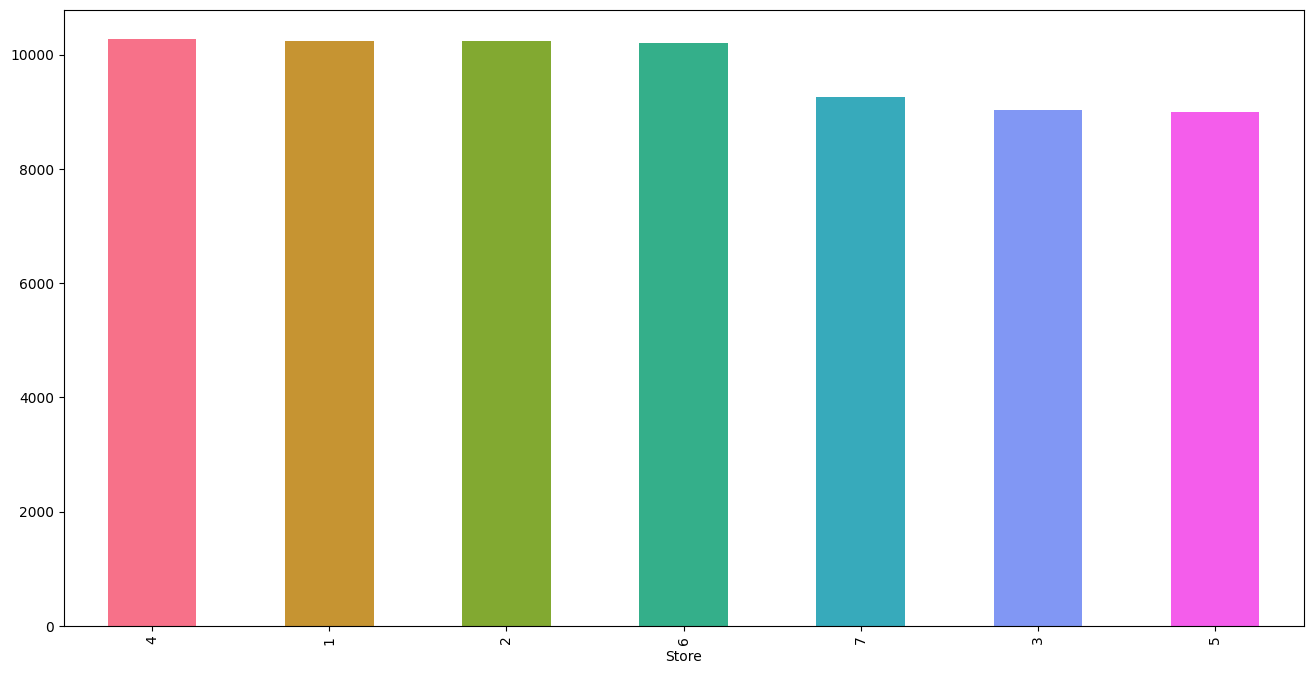

In [40]:
plot_cat("Store")

Dept
1     1001
31    1001
33    1001
34    1001
35    1001
      ... 
99     161
47     110
78      34
77      23
39       5
Name: count, Length: 78, dtype: int64


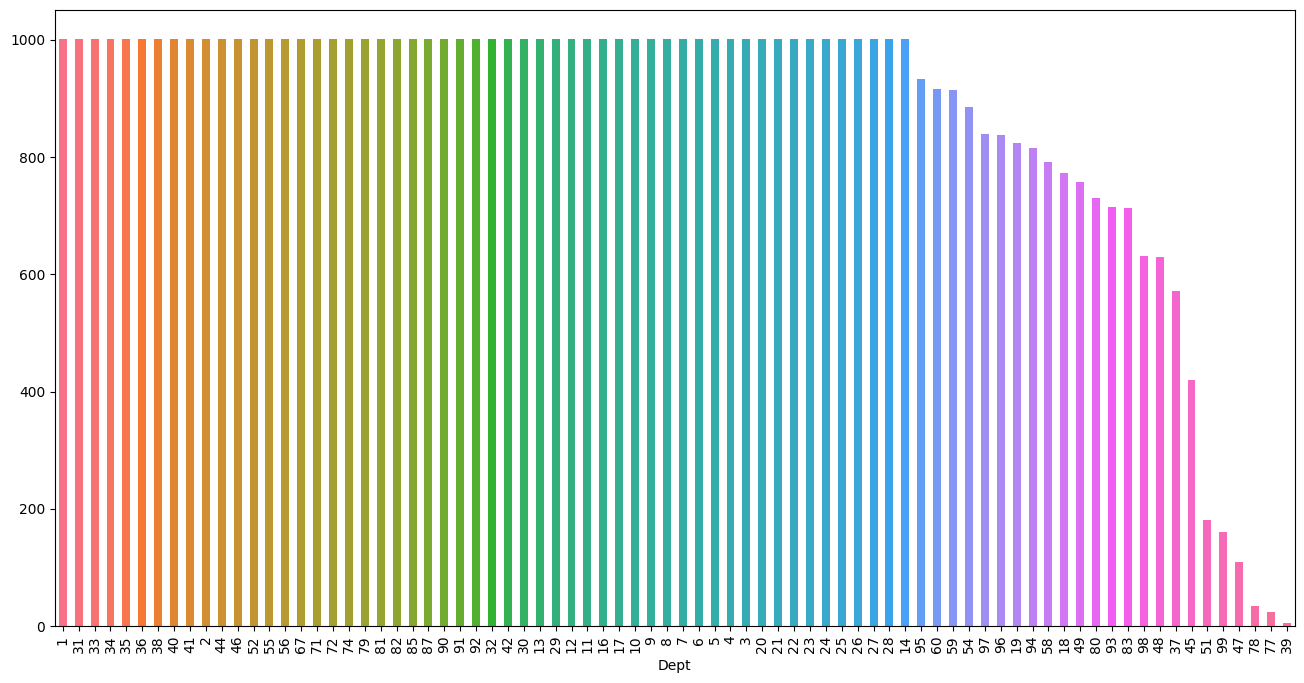

In [41]:
plot_cat("Dept")

IsHoliday
False    63445
True      4822
Name: count, dtype: int64


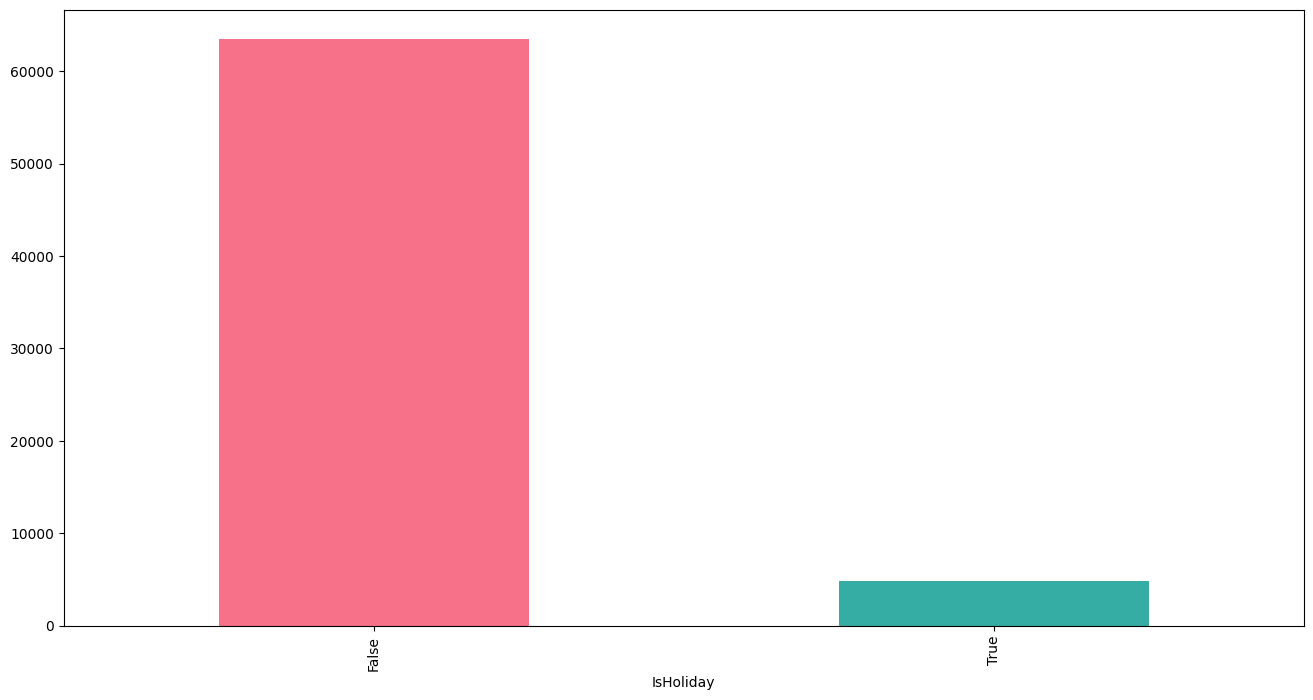

In [42]:
plot_cat("IsHoliday")

Temperature
78.69    205
59.33    201
78.53    196
84.94    195
47.96    148
        ... 
87.05     60
65.13     60
85.10     60
56.66     60
80.57     60
Name: count, Length: 926, dtype: int64


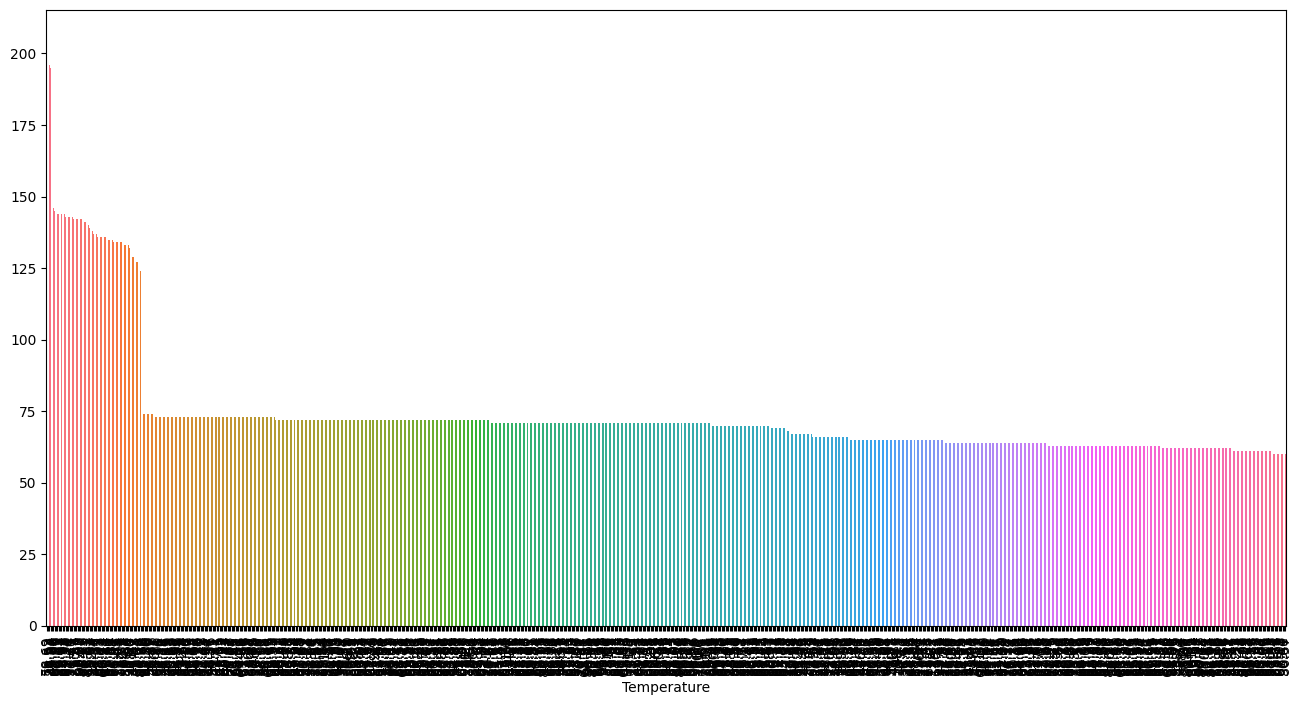

In [43]:
plot_cat("Temperature")

CPI
126.496258    75
220.041741    74
126.606645    74
221.864499    74
126.471333    74
              ..
193.711525    60
222.390005    60
210.989120    60
214.973044    60
218.546705    60
Name: count, Length: 1001, dtype: int64


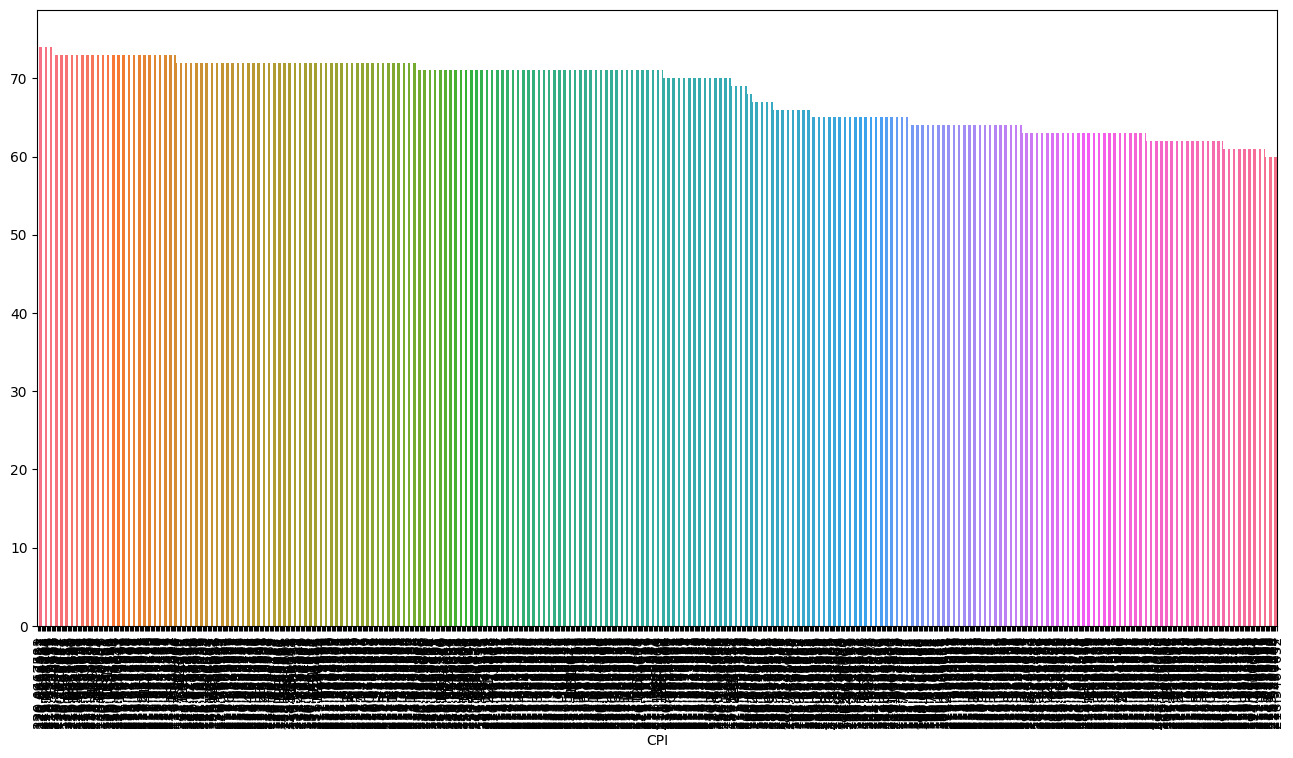

In [44]:
plot_cat("CPI")

Type
A    40965
B    27302
Name: count, dtype: int64


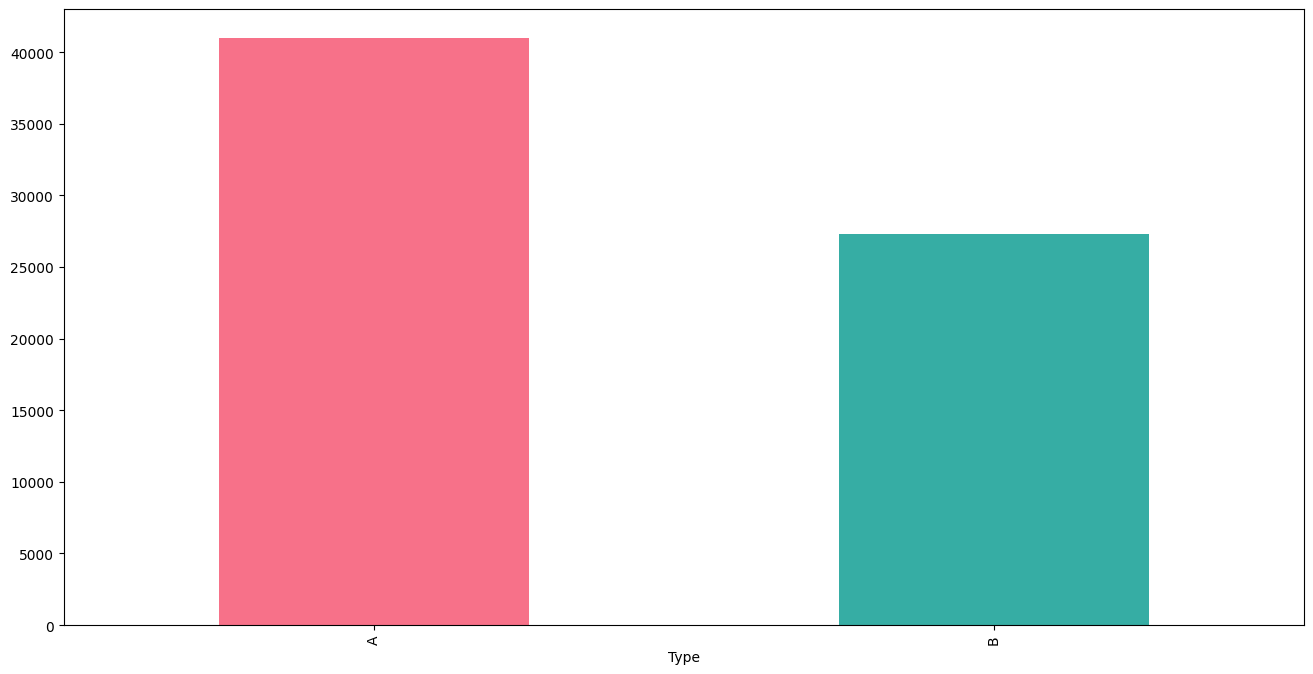

In [45]:
plot_cat("Type")

Year
2011    24843
2010    22905
2012    20519
Name: count, dtype: int64


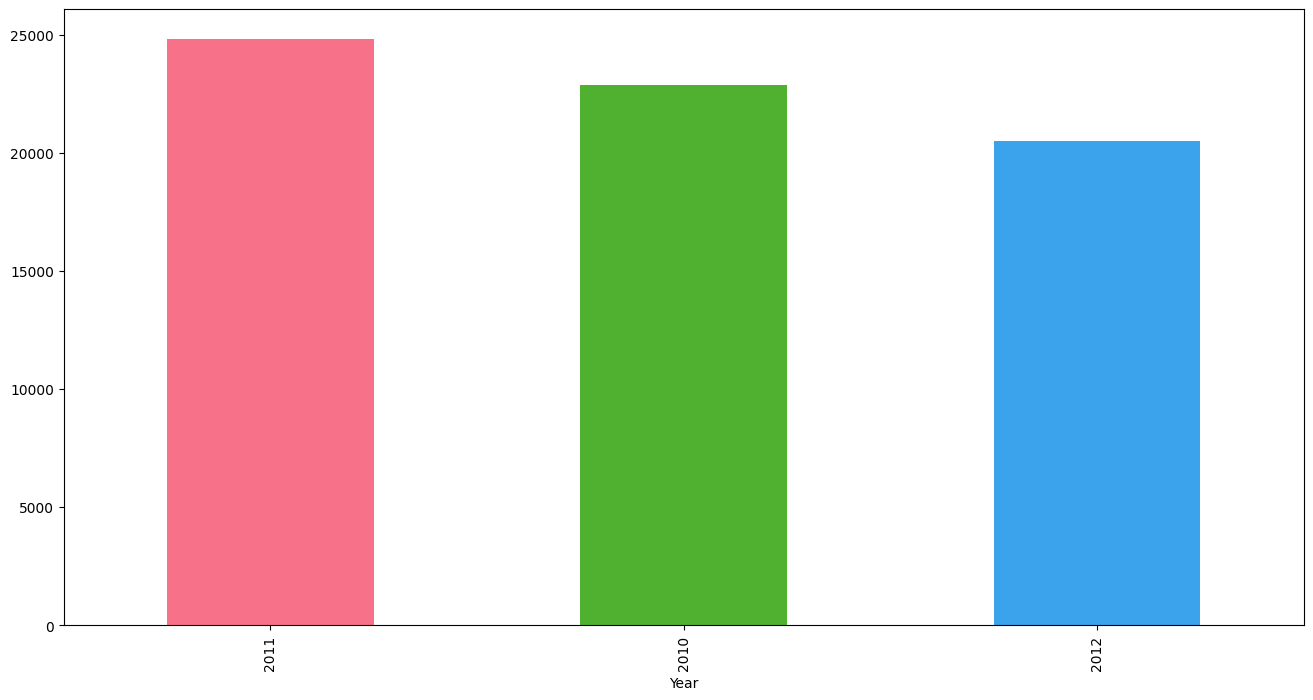

In [46]:
plot_cat("Year")

Month
4     6696
7     6587
3     6252
10    6229
9     6199
6     6147
8     6146
2     5804
5     5697
12    4842
11    3841
1     3827
Name: count, dtype: int64


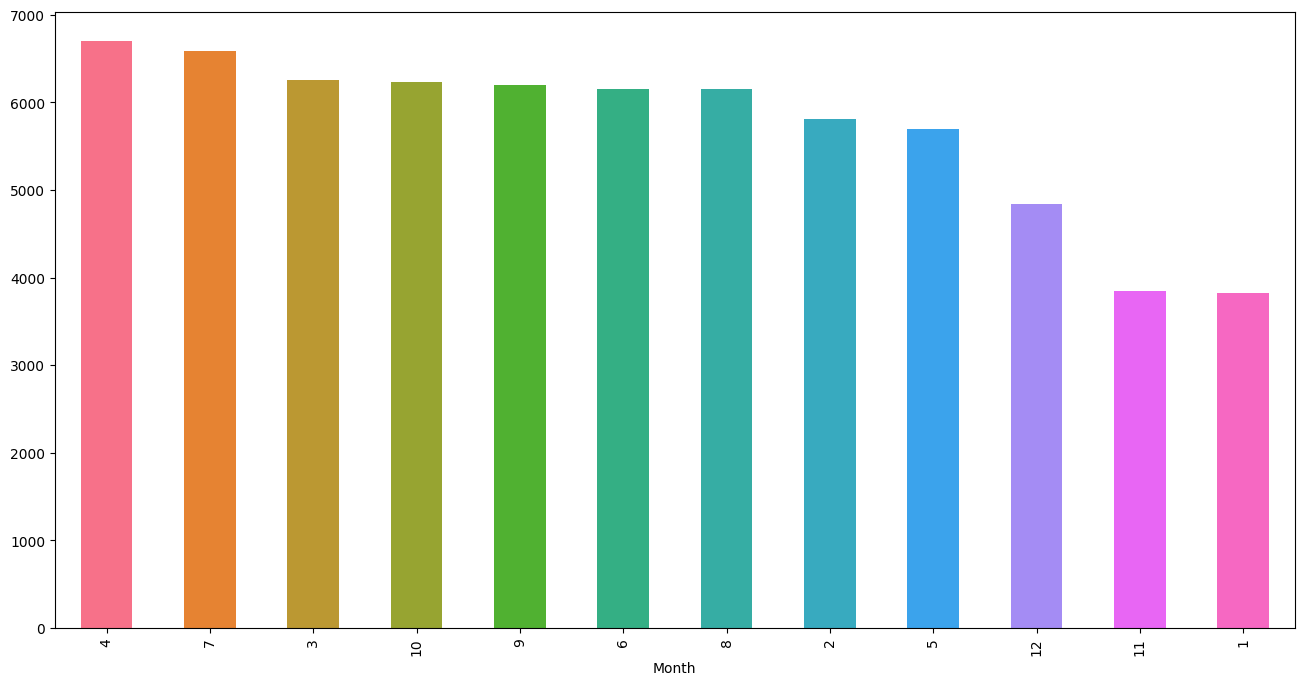

In [47]:
plot_cat("Month")

Day
26    2403
19    2401
12    2400
2     2398
23    2396
5     2394
17    2394
9     2394
16    2393
24    2390
30    2390
20    2389
11    2388
25    2388
3     2387
6     2387
10    2386
4     2386
18    2381
13    2381
27    2375
7     1913
14    1909
28    1907
21    1906
15    1898
8     1897
1     1896
22    1896
29    1890
31     954
Name: count, dtype: int64


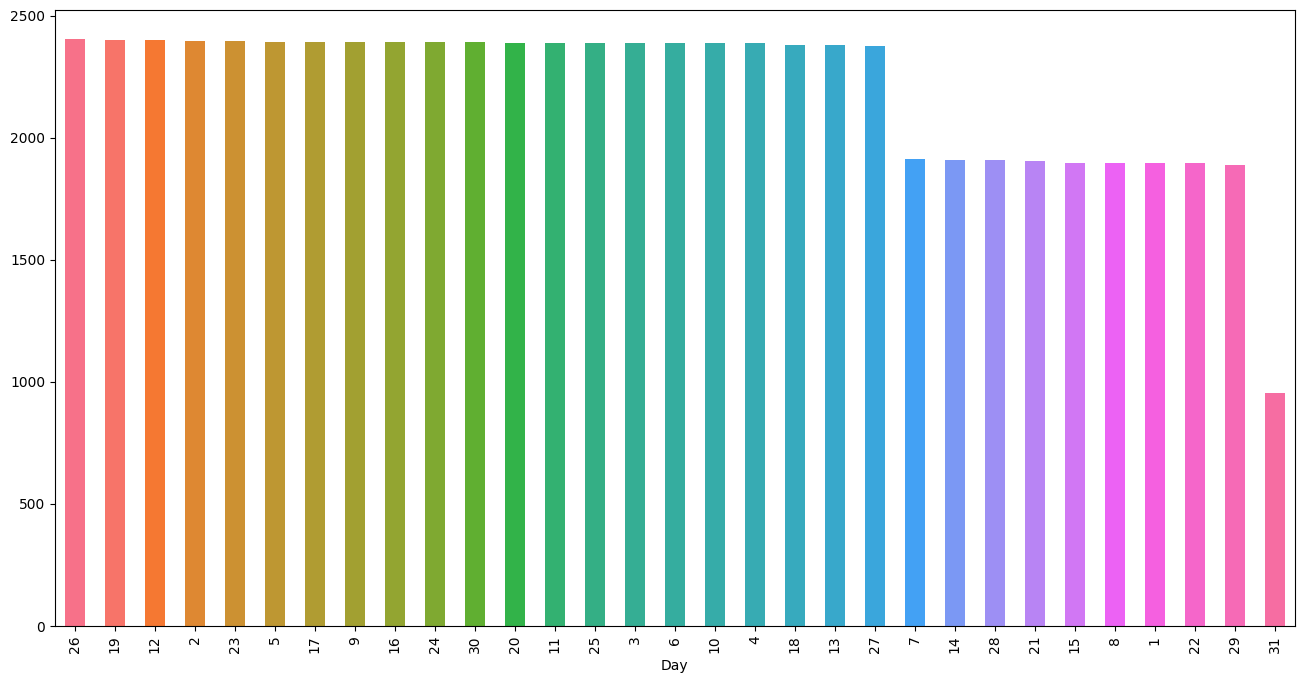

In [48]:
plot_cat("Day")

MarkDown1
0.00        43850
9762.39        74
12635.19       74
429.03         74
2725.36        74
            ...  
2592.37        61
2297.32        61
2696.67        61
1649.56        60
2046.93        60
Name: count, Length: 358, dtype: int64


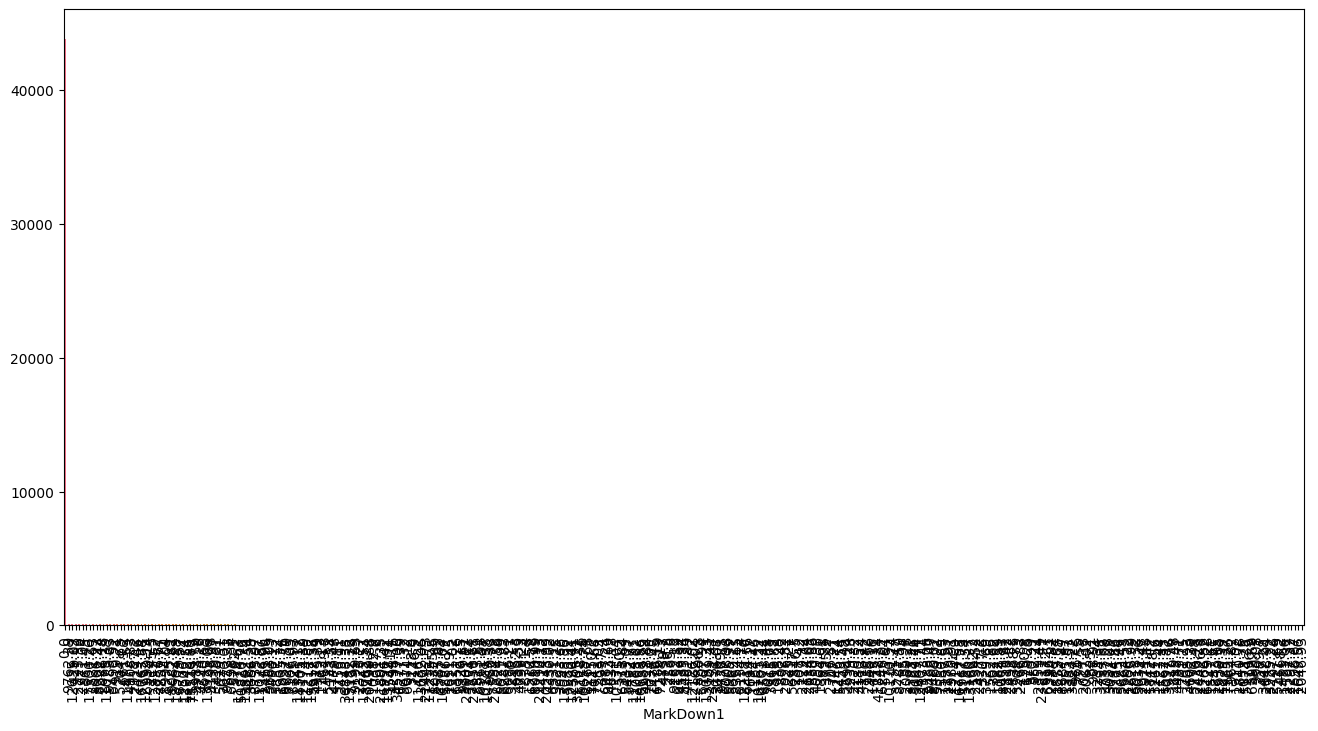

In [49]:
plot_cat("MarkDown1")

MarkDown2
0.00     48882
7.64       216
5.73       206
6.47       198
16.00      144
         ...  
8.00        61
7.75        61
1.90        61
49.00       61
8.80        60
Name: count, Length: 267, dtype: int64


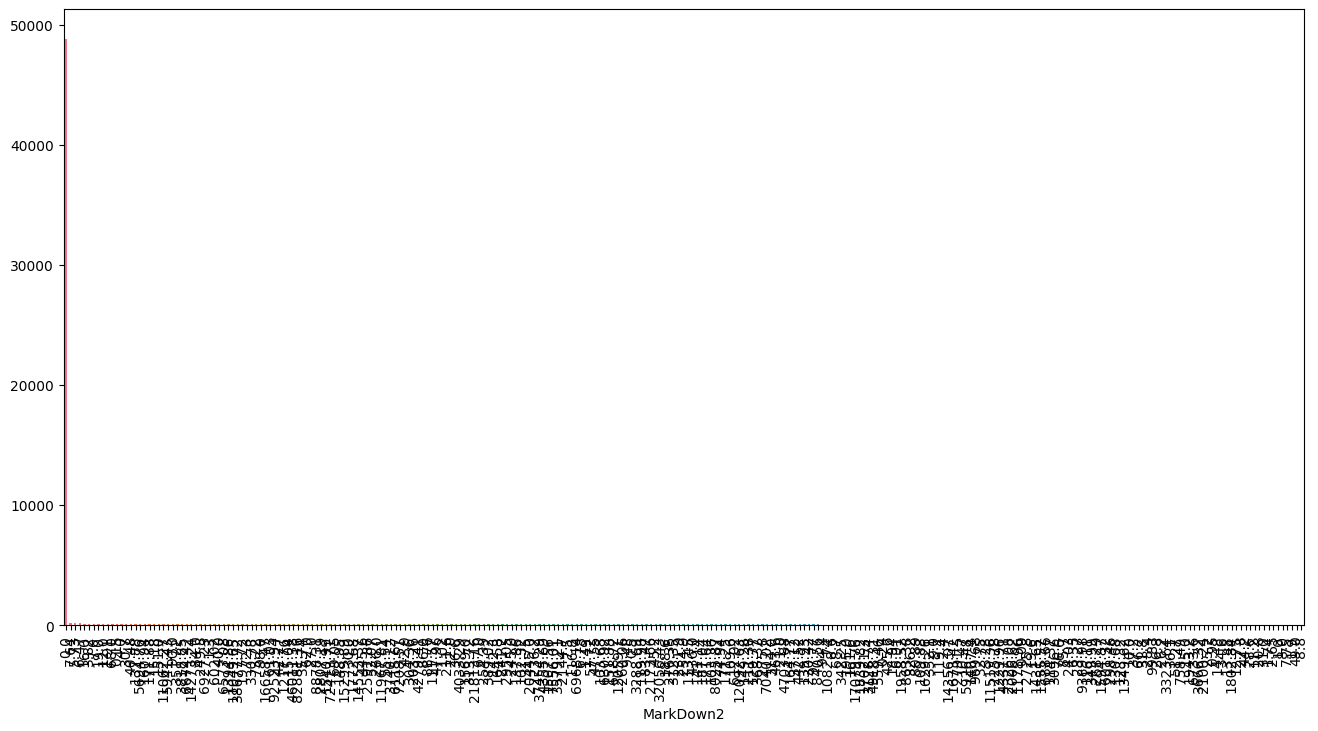

In [50]:
plot_cat("MarkDown2")

MarkDown3
0.00     45350
3.00       337
1.65       217
8.11       145
24.60      144
         ...  
0.36        61
13.00       61
9.61        61
42.75       61
2.31        60
Name: count, Length: 316, dtype: int64


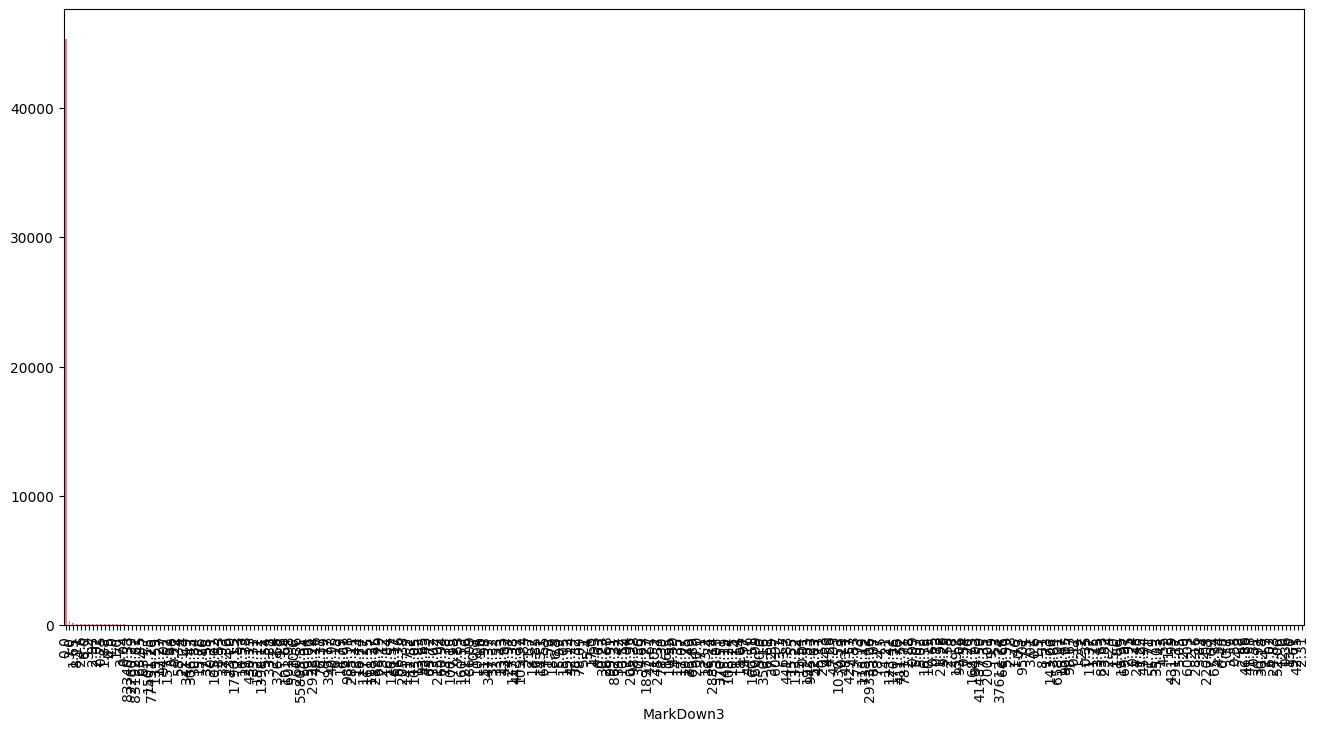

In [51]:
plot_cat("MarkDown3")

MarkDown4
0.00       44183
8.00         140
12.00        130
24.90         74
8976.17       74
           ...  
2799.14       61
968.75        61
709.19        61
677.36        60
1955.75       60
Name: count, Length: 351, dtype: int64


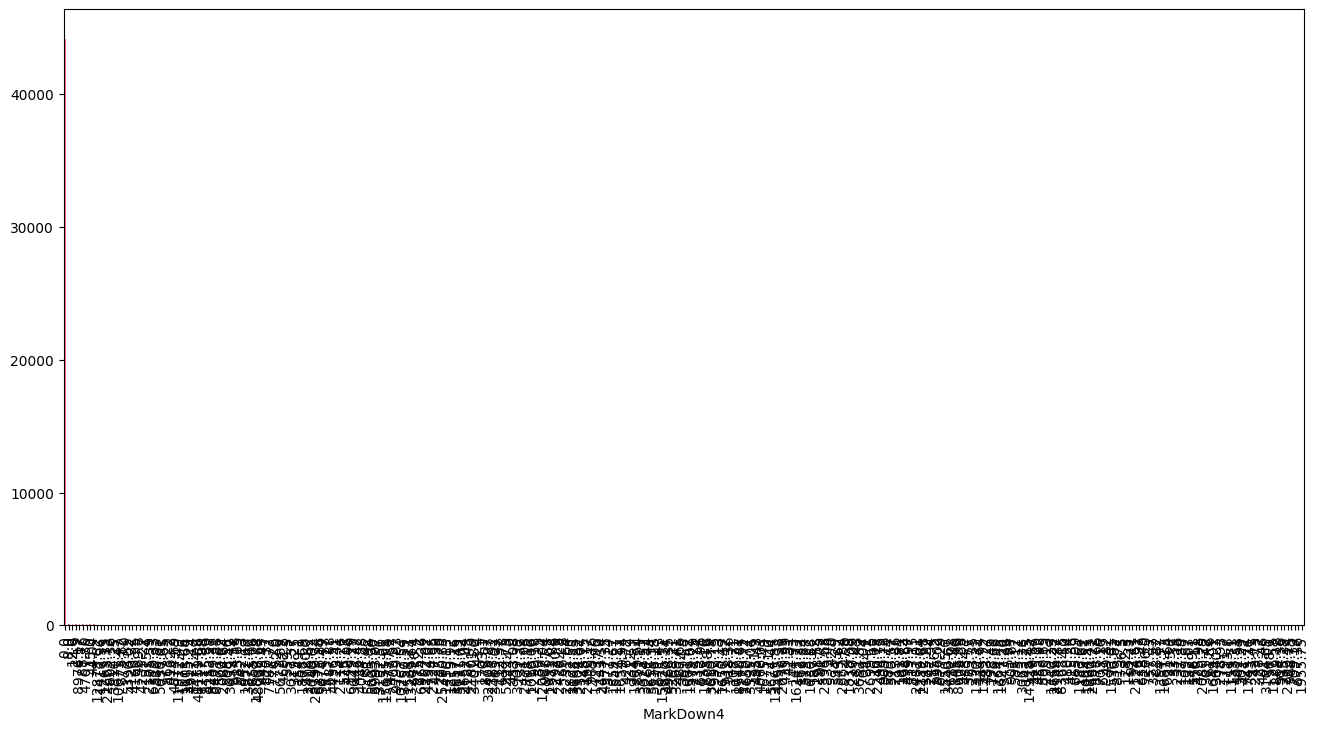

In [52]:
plot_cat("MarkDown4")

MarkDown5
0.00        43850
28604.20       74
6779.43        74
986.23         74
2739.43        74
            ...  
2768.98        61
1182.52        61
2152.23        61
1205.23        60
2762.83        60
Name: count, Length: 358, dtype: int64


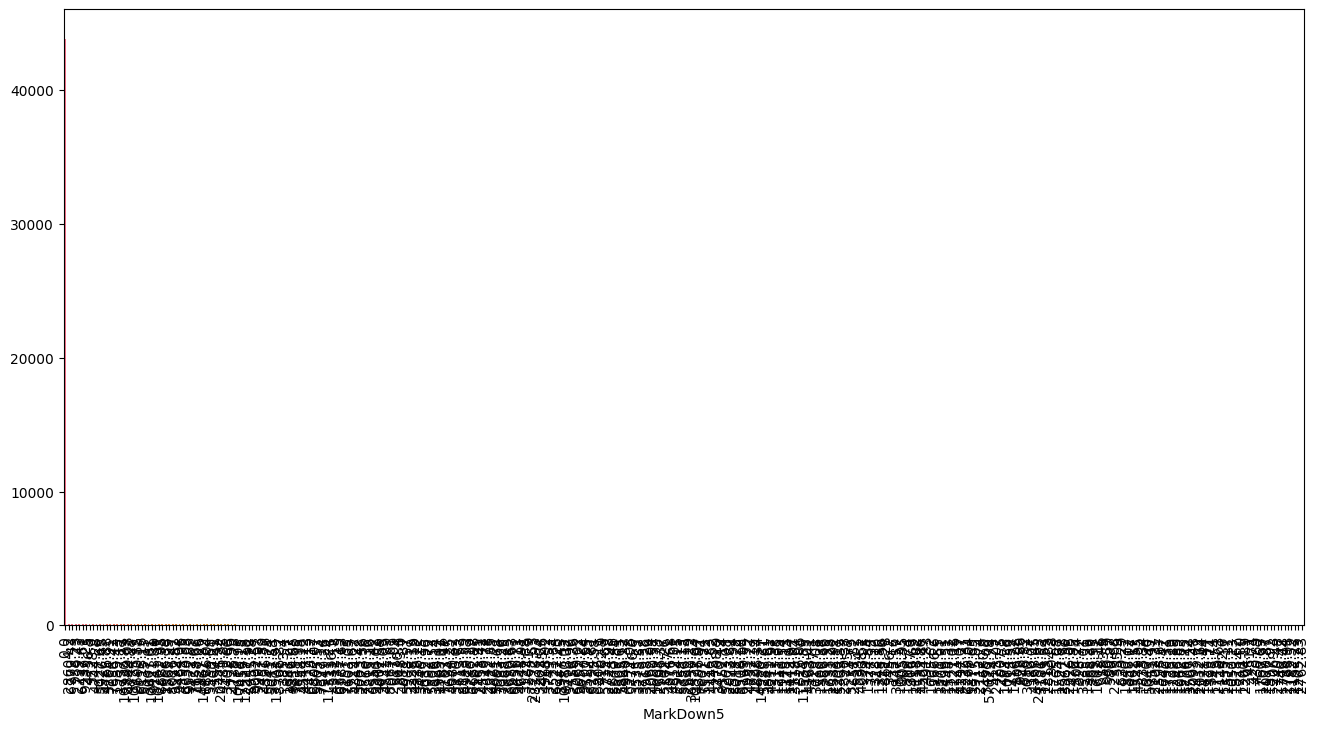

In [53]:
plot_cat("MarkDown5")

In [54]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object', 'O','bool']]

In [55]:
numeric_var_names

['Store',
 'Dept',
 'Weekly_Sales',
 'Size',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Year',
 'Month',
 'Day']

In [56]:
cat_var_names

['Type', 'IsHoliday']

In [57]:
data_num=data[numeric_var_names]
data_num.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
0,1,1,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
1,1,1,46039.49,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,12
2,1,1,41595.55,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,19
3,1,1,19403.54,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,26
4,1,1,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,5


In [58]:
data_num.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

In [59]:
pd.set_option('mode.chained_assignment', None) # For SettingWithCopyWarning
data_num[data_num<=0]=np.NaN

In [60]:
data_num.isna().sum()

Store               0
Dept                0
Weekly_Sales      124
Size                0
Temperature        66
Fuel_Price          0
MarkDown1       43850
MarkDown2       48882
MarkDown3       45350
MarkDown4       44183
MarkDown5       43850
CPI                 0
Unemployment        0
Year                0
Month               0
Day                 0
dtype: int64

In [61]:
data_cat=data[cat_var_names]
data_cat.head(5)

,Type,IsHoliday
0,A,False
1,A,True
2,A,False
3,A,False
4,A,False


In [62]:
data_cat[data_cat['Type']=='B']

,Type,IsHoliday
20482,B,False
20483,B,True
20484,B,False
20485,B,False
20486,B,False
...,...,...
68262,B,False
68263,B,False
68264,B,False
68265,B,False


In [63]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,68267.0,0.0,2.700460e+05,3.955733,4.000000,2.008158,4.032699e+00,0.507658,1.000,1.0000,1.000000,1.000000,2.000000,4.000000,6.000000,7.000000,7.000000,7.000000,7.000000
Dept,68267.0,0.0,2.948674e+06,43.193256,36.000000,29.573102,8.745684e+02,0.684669,1.000,1.0000,4.000000,7.000000,19.000000,36.000000,71.000000,91.000000,94.000000,98.000000,99.000000
Weekly_Sales,68143.0,124.0,1.202337e+09,17644.315330,7582.980000,26106.050624,6.815259e+08,1.479573,0.010,10.4700,188.381000,569.890000,2313.060000,7582.980000,20971.395000,48365.776000,72117.883000,132724.654000,385051.040000
Size,68267.0,0.0,9.110705e+09,133456.938565,151315.000000,72786.007115,5.297803e+09,0.545389,34875.000,34875.0000,34875.000000,34875.000000,37392.000000,151315.000000,202505.000000,205863.000000,205863.000000,205863.000000,205863.000000
Temperature,68201.0,66.0,4.379835e+06,64.219519,66.900000,17.826948,3.178001e+02,0.277594,7.460,15.5600,30.640000,40.190000,51.490000,66.900000,79.780000,85.180000,87.360000,90.380000,93.340000
Fuel_Price,68267.0,0.0,2.199413e+05,3.221780,3.290000,0.424520,1.802169e-01,0.131766,2.514,2.5480,2.603000,2.640000,2.762000,3.290000,3.594000,3.743000,3.814000,3.906000,3.936000
MarkDown1,24417.0,43850.0,1.747459e+08,7156.729323,5183.290000,7988.962897,6.382353e+07,1.116287,35.940,107.4200,774.550000,1246.740000,2564.410000,5183.290000,8994.040000,13737.910000,20499.880000,41848.340000,75149.790000
MarkDown2,19385.0,48882.0,6.153709e+07,3174.469499,151.000000,10318.729576,1.064762e+08,3.250537,0.090,0.1500,2.400000,6.910000,30.700000,151.000000,1569.000000,7040.020000,14553.370000,72413.710000,92523.940000
MarkDown3,22917.0,45350.0,3.215303e+07,1403.020755,23.120000,9131.936396,8.339226e+07,6.508768,0.010,0.0900,0.550000,1.650000,4.690000,23.120000,98.670000,399.770000,984.980000,55805.510000,83340.330000
MarkDown4,24084.0,44183.0,7.576960e+07,3146.055598,1331.900000,5569.853128,3.102326e+07,1.770424,4.000,8.0000,41.510000,113.800000,444.640000,1331.900000,3643.770000,7217.880000,12877.294000,28199.340000,48159.860000


In [64]:
num_summary=data_num.apply(var_summary).T
num_summary.to_csv('num_summary.csv')

In [65]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()],
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

In [66]:
cat_summary

,Type,IsHoliday
N,68267,68267
NMISS,0,0
ColumnsNames,"Type A 40965 B 27302 Name: count, dtype:...",IsHoliday False 63445 True 4822 Name: ...


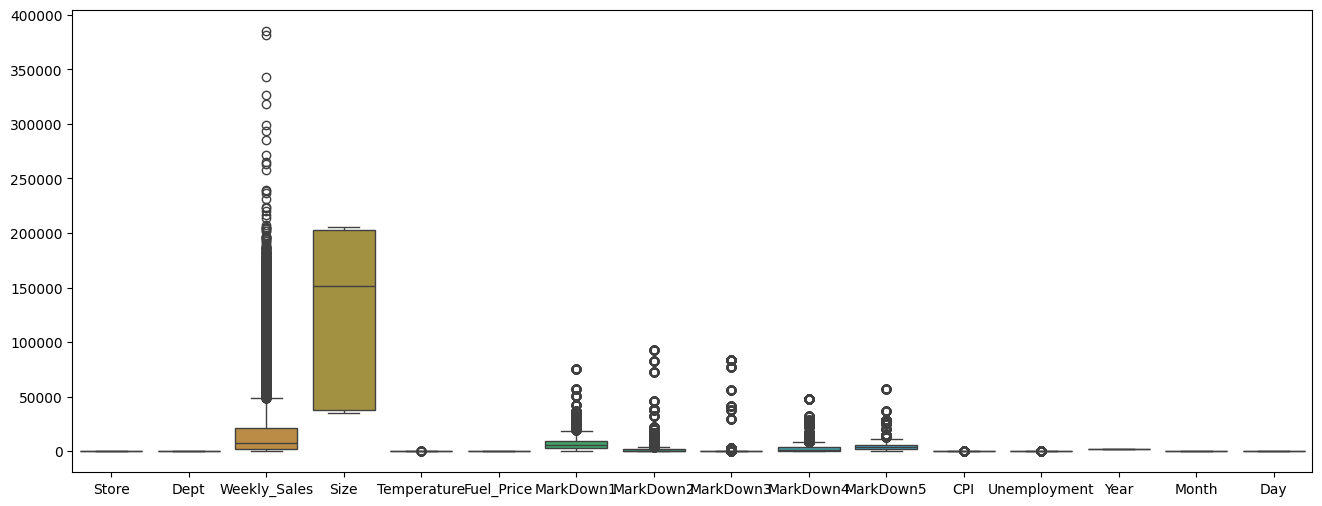

In [67]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_num)
plt.show()

In [68]:
def inv_trans(x):
    return 1/x

data_4 = data_num.copy()
data_4['Weekly_Sales'] = data_4['Weekly_Sales'].apply(inv_trans)
# data_4['Total_MarkDown']=data_4['Total_MarkDown'].apply(inv_trans)
data_4['MarkDown1']=data_4['MarkDown1'].apply(inv_trans)
data_4['MarkDown2']=data_4['MarkDown2'].apply(inv_trans)
data_4['MarkDown3']=data_4['MarkDown3'].apply(inv_trans)
data_4['MarkDown4']=data_4['MarkDown4'].apply(inv_trans)
data_4['MarkDown5']=data_4['MarkDown5'].apply(inv_trans)

In [69]:
data_4.Weekly_Sales

0        0.000040
1        0.000022
2        0.000024
3        0.000052
4        0.000046
           ...   
68262    0.000029
68263    0.000026
68264    0.000024
68265    0.000021
68266    0.002433
Name: Weekly_Sales, Length: 68267, dtype: float64

In [70]:
data_4.MarkDown1

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
68262   NaN
68263   NaN
68264   NaN
68265   NaN
68266   NaN
Name: MarkDown1, Length: 68267, dtype: float64

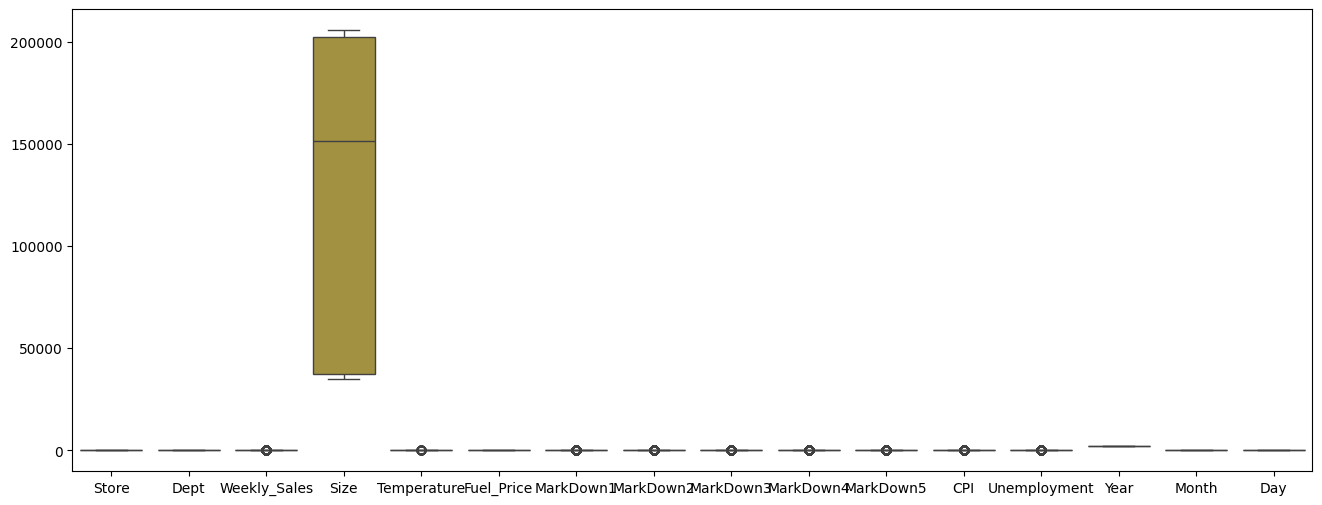

In [71]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_4)
plt.show()

In [72]:
data_num.isna().sum()

Store               0
Dept                0
Weekly_Sales      124
Size                0
Temperature        66
Fuel_Price          0
MarkDown1       43850
MarkDown2       48882
MarkDown3       45350
MarkDown4       44183
MarkDown5       43850
CPI                 0
Unemployment        0
Year                0
Month               0
Day                 0
dtype: int64

In [73]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(Missing_imputation)

In [74]:
data_num.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

In [75]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       68267 non-null  object
 1   IsHoliday  68267 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 600.1+ KB


In [76]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()

data_cat["IsHoliday"] = encode.fit_transform(data_cat[["IsHoliday"]])
data_cat["Type"] = encode.fit_transform(data_cat[["Type"]])


data_cat.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Type,IsHoliday
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [77]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Type       68267 non-null  int64
 1   IsHoliday  68267 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB


In [78]:
data = pd.concat([data_num, data_cat], axis=1)
data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
0,1,1,24924.50,151315,42.31,2.572,5183.29,151.0,23.12,1331.9,3558.18,211.096358,8.106,2010,2,5,0,0
1,1,1,46039.49,151315,38.51,2.548,5183.29,151.0,23.12,1331.9,3558.18,211.242170,8.106,2010,2,12,0,1
2,1,1,41595.55,151315,39.93,2.514,5183.29,151.0,23.12,1331.9,3558.18,211.289143,8.106,2010,2,19,0,0
3,1,1,19403.54,151315,46.63,2.561,5183.29,151.0,23.12,1331.9,3558.18,211.319643,8.106,2010,2,26,0,0
4,1,1,21827.90,151315,46.50,2.625,5183.29,151.0,23.12,1331.9,3558.18,211.350143,8.106,2010,3,5,0,0


In [79]:
corrm=data.corr()
corrm.to_csv('corrm.csv')
corrm

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
Store,1.000000,-0.020041,-0.138310,-0.231699,-0.320345,0.009793,-0.051000,-0.023267,-0.003680,-0.059066,-0.042497,-0.151470,-0.020036,-0.000592,-0.000873,0.000203,0.431409,0.000497
Dept,-0.020041,1.000000,0.187523,0.051181,0.009771,0.003400,0.012357,0.005642,0.003852,0.012031,0.012533,-0.013644,-0.010927,0.004737,0.001811,-0.000863,-0.052492,0.001017
Weekly_Sales,-0.138310,0.187523,1.000000,0.348304,0.030451,-0.000639,0.068335,0.027466,0.035801,0.063546,0.084390,-0.156275,-0.075493,0.004447,0.022813,-0.007440,-0.343394,0.013600
Size,-0.231699,0.051181,0.348304,1.000000,0.104486,-0.006011,0.189818,0.084758,0.032049,0.161438,0.217505,-0.348371,-0.174763,0.000714,-0.000651,-0.000732,-0.959934,-0.000014
Temperature,-0.320345,0.009771,0.030451,0.104486,1.000000,0.199075,-0.008762,-0.162787,-0.045970,0.012020,-0.043748,0.200214,-0.335953,0.082012,0.198980,0.035216,-0.193104,-0.164267
Fuel_Price,0.009793,0.003400,-0.000639,-0.006011,0.199075,1.000000,0.092665,0.009001,0.005721,0.101046,0.029423,0.094871,-0.356800,0.808051,-0.078643,0.030418,0.008088,-0.088532
MarkDown1,-0.051000,0.012357,0.068335,0.189818,-0.008762,0.092665,1.000000,0.056346,-0.088009,0.838565,0.181927,-0.049103,-0.118316,0.203223,-0.130147,-0.196582,-0.178124,-0.027353
MarkDown2,-0.023267,0.005642,0.027466,0.084758,-0.162787,0.009001,0.056346,1.000000,-0.009922,0.039859,0.047140,-0.013684,-0.077748,0.105799,0.001927,0.065265,-0.079313,0.228464
MarkDown3,-0.003680,0.003852,0.035801,0.032049,-0.045970,0.005721,-0.088009,-0.009922,1.000000,-0.040868,-0.015400,-0.008199,-0.025769,0.005789,0.120139,0.083173,-0.029486,0.289809
MarkDown4,-0.059066,0.012031,0.063546,0.161438,0.012020,0.101046,0.838565,0.039859,-0.040868,1.000000,0.193412,-0.054593,-0.194807,0.243706,-0.097471,-0.166198,-0.157587,0.001030


<Axes: >

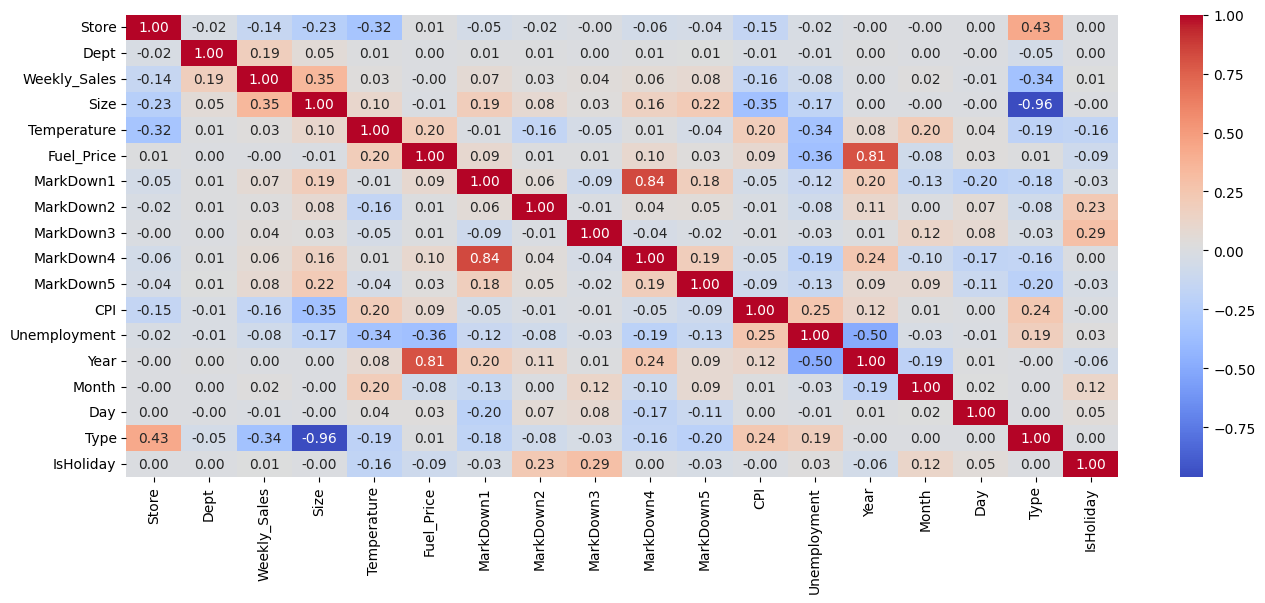

In [80]:
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="coolwarm",fmt=".2f")

In [81]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Type', 'IsHoliday'],
      dtype='object')

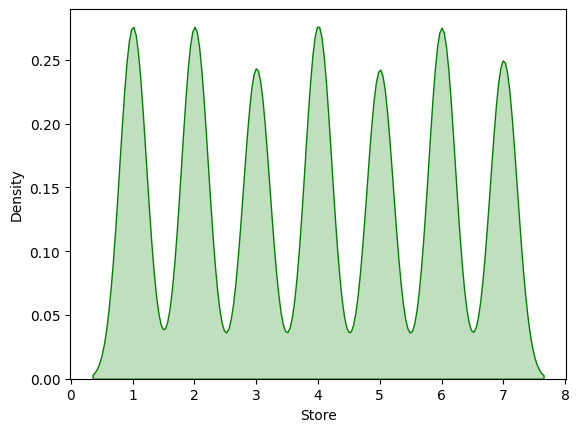

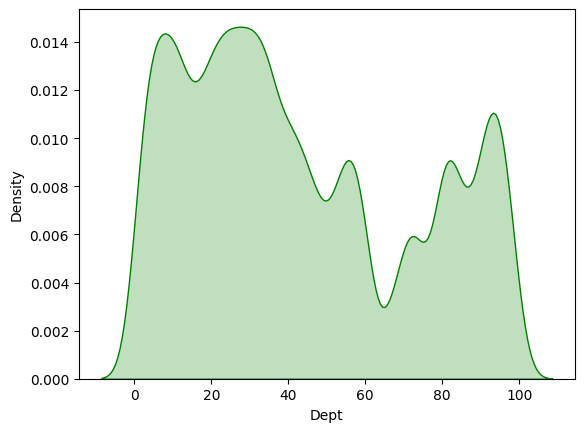

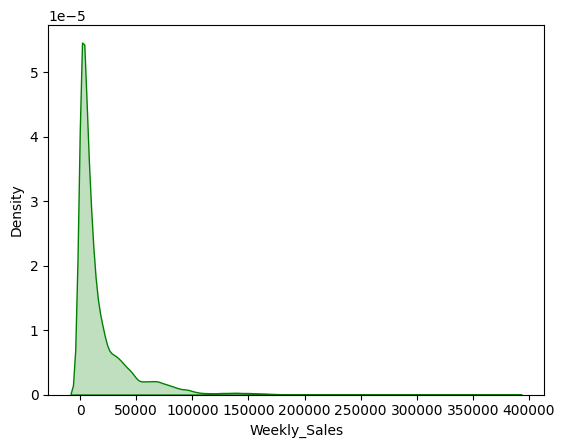

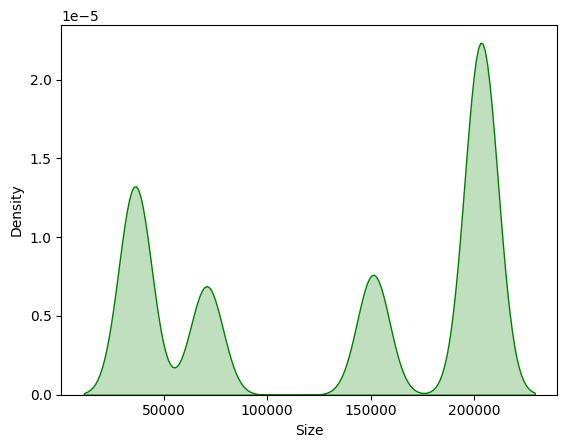

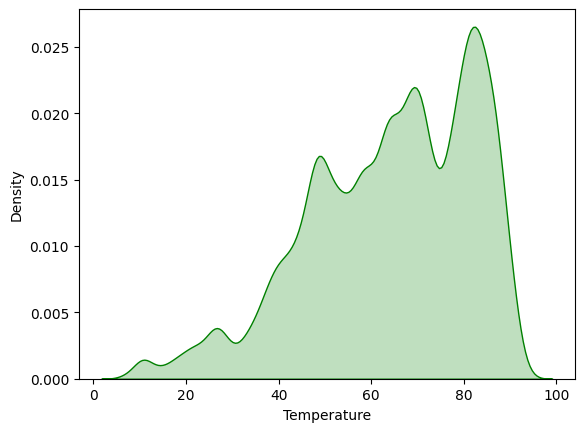

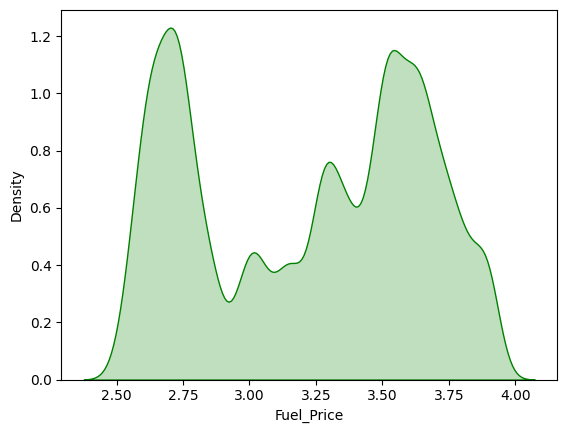

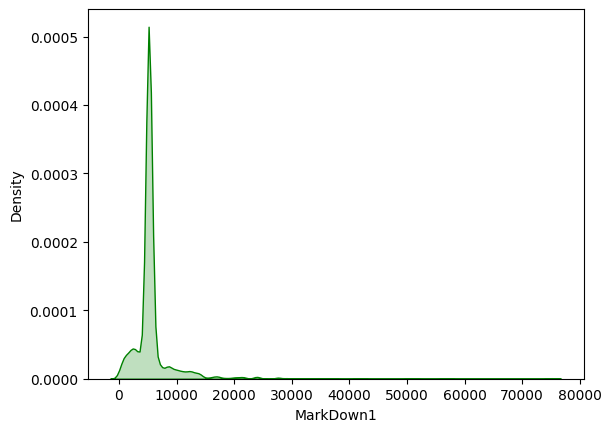

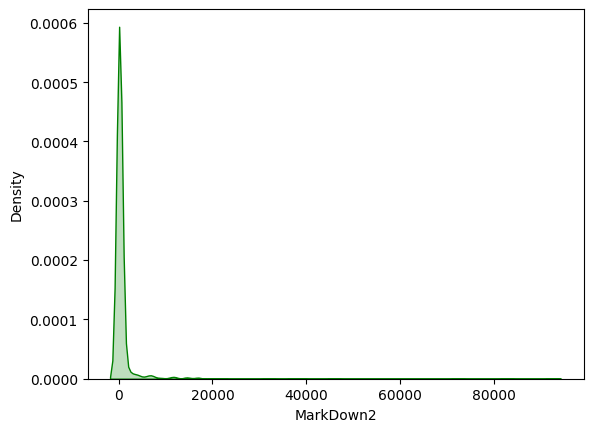

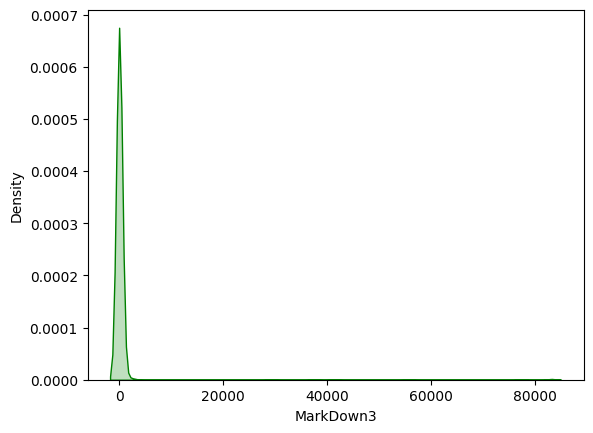

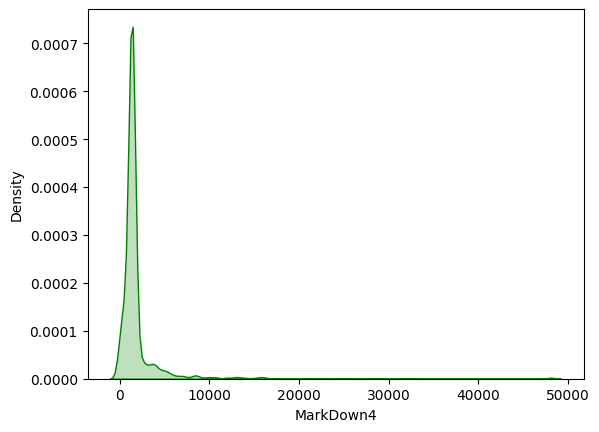

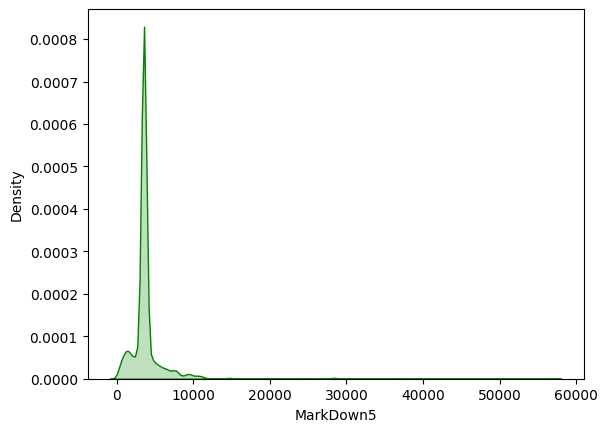

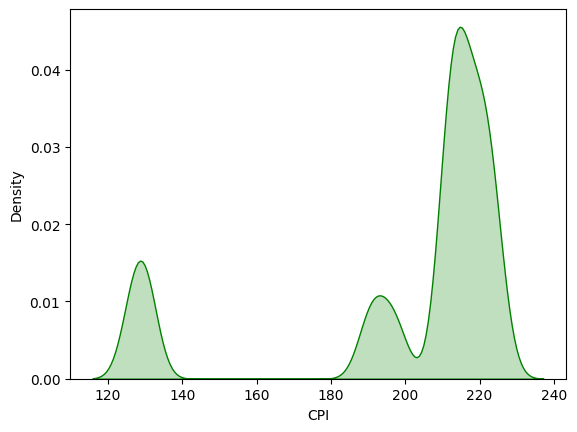

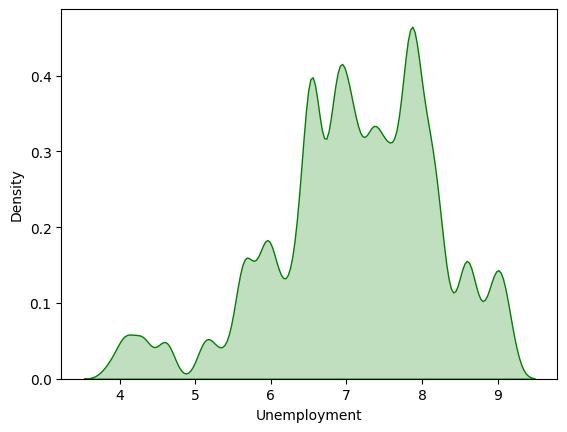

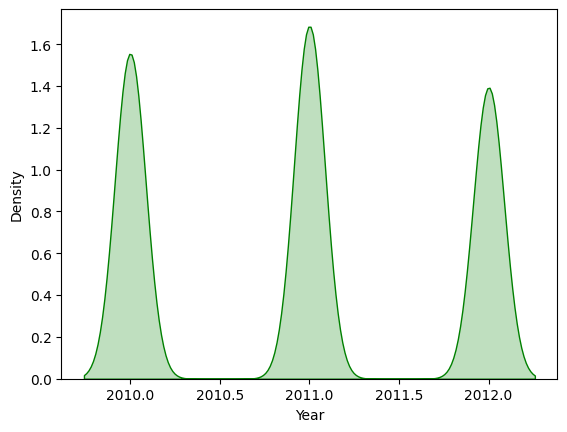

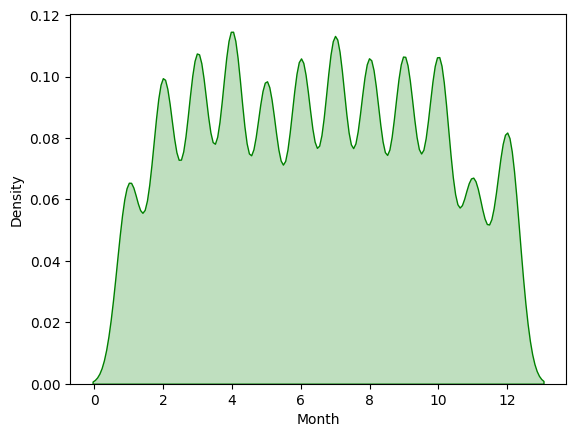

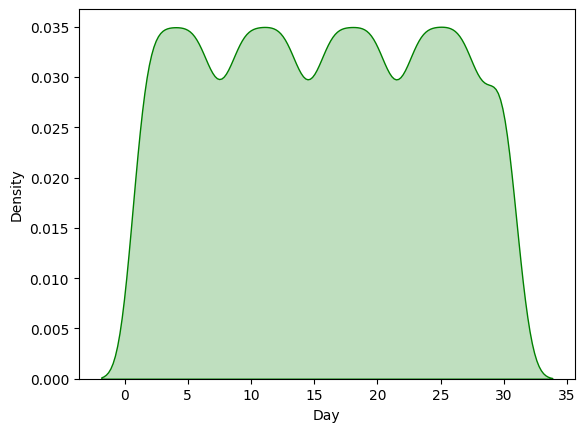

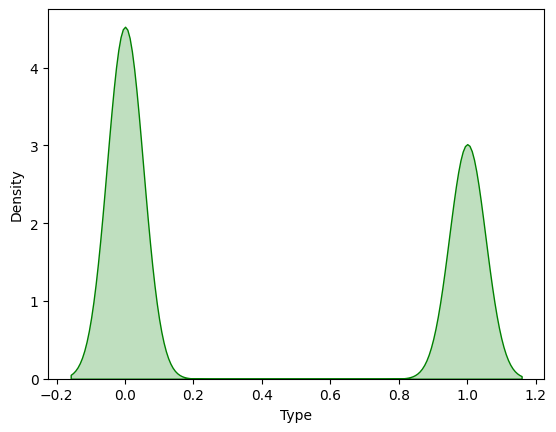

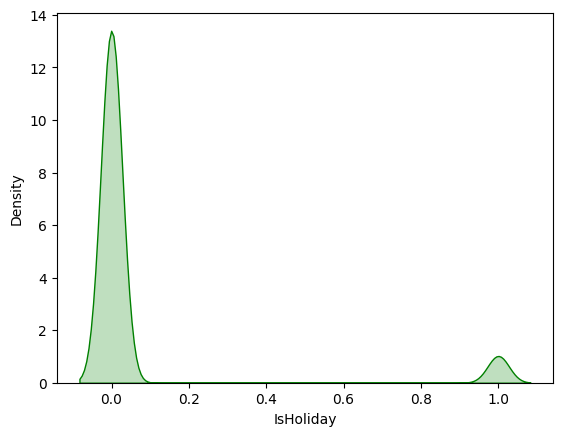

In [82]:
for i in data.columns:
    sns.kdeplot(data=data[i],fill=True,color="g")
    plt.show()

In [83]:
data.to_csv("final_data.csv")

In [84]:
data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
0,1,1,24924.50,151315,42.31,2.572,5183.29,151.0,23.12,1331.9,3558.18,211.096358,8.106,2010,2,5,0,0
1,1,1,46039.49,151315,38.51,2.548,5183.29,151.0,23.12,1331.9,3558.18,211.242170,8.106,2010,2,12,0,1
2,1,1,41595.55,151315,39.93,2.514,5183.29,151.0,23.12,1331.9,3558.18,211.289143,8.106,2010,2,19,0,0
3,1,1,19403.54,151315,46.63,2.561,5183.29,151.0,23.12,1331.9,3558.18,211.319643,8.106,2010,2,26,0,0
4,1,1,21827.90,151315,46.50,2.625,5183.29,151.0,23.12,1331.9,3558.18,211.350143,8.106,2010,3,5,0,0


In [85]:
da=data[data['Type']==1]

In [86]:
da

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
20482,3,1,6453.58,37392,45.71,2.572,5183.29,151.0,23.12,1331.9,3558.18,214.424881,7.368,2010,2,5,1,0
20483,3,1,12748.72,37392,47.93,2.548,5183.29,151.0,23.12,1331.9,3558.18,214.574792,7.368,2010,2,12,1,1
20484,3,1,8918.31,37392,47.07,2.514,5183.29,151.0,23.12,1331.9,3558.18,214.619887,7.368,2010,2,19,1,0
20485,3,1,4992.00,37392,52.05,2.561,5183.29,151.0,23.12,1331.9,3558.18,214.647513,7.368,2010,2,26,1,0
20486,3,1,5172.73,37392,53.04,2.625,5183.29,151.0,23.12,1331.9,3558.18,214.675139,7.368,2010,3,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68262,7,95,34726.21,70713,48.79,3.697,5183.29,151.0,23.12,1331.9,3558.18,192.903476,8.595,2011,6,17,1,0
68263,7,95,38203.12,70713,46.85,3.661,5183.29,151.0,23.12,1331.9,3558.18,192.998266,8.595,2011,6,24,1,0
68264,7,95,42550.03,70713,58.54,3.597,5183.29,151.0,23.12,1331.9,3558.18,193.093055,8.622,2011,7,1,1,0
68265,7,95,47194.97,70713,59.08,3.540,5183.29,151.0,23.12,1331.9,3558.18,193.187845,8.622,2011,7,8,1,0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         68267 non-null  int64  
 1   Dept          68267 non-null  int64  
 2   Weekly_Sales  68267 non-null  float64
 3   Size          68267 non-null  int64  
 4   Temperature   68267 non-null  float64
 5   Fuel_Price    68267 non-null  float64
 6   MarkDown1     68267 non-null  float64
 7   MarkDown2     68267 non-null  float64
 8   MarkDown3     68267 non-null  float64
 9   MarkDown4     68267 non-null  float64
 10  MarkDown5     68267 non-null  float64
 11  CPI           68267 non-null  float64
 12  Unemployment  68267 non-null  float64
 13  Year          68267 non-null  int64  
 14  Month         68267 non-null  int64  
 15  Day           68267 non-null  int64  
 16  Type          68267 non-null  int64  
 17  IsHoliday     68267 non-null  int64  
dtypes: float64(10), int64(8)
m

In [88]:
_, pvalue = stats.ttest_ind(data['Unemployment'],data['Fuel_Price'])
pvalue

0.0

In [89]:
_, pvalue = stats.ttest_ind(data['Unemployment'],data['CPI'])
pvalue

0.0

In [90]:
_, pvalue = stats.ttest_ind(data['Unemployment'],data['Year'])
pvalue

0.0

In [91]:
_, pvalue = stats.ttest_ind(data['MarkDown1'],data['Year'])
pvalue

0.0

In [92]:

_, pvalue = stats.ttest_ind(data['Type'],data['Size'])
pvalue

0.0

In [93]:
_, pvalue = stats.ttest_ind(data['MarkDown1'],data['MarkDown4'])
pvalue

0.0

In [94]:
_, pvalue = stats.ttest_ind(data['Year'],data['Fuel_Price'])
pvalue

0.0

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68267 entries, 0 to 68266
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         68267 non-null  int64  
 1   Dept          68267 non-null  int64  
 2   Weekly_Sales  68267 non-null  float64
 3   Size          68267 non-null  int64  
 4   Temperature   68267 non-null  float64
 5   Fuel_Price    68267 non-null  float64
 6   MarkDown1     68267 non-null  float64
 7   MarkDown2     68267 non-null  float64
 8   MarkDown3     68267 non-null  float64
 9   MarkDown4     68267 non-null  float64
 10  MarkDown5     68267 non-null  float64
 11  CPI           68267 non-null  float64
 12  Unemployment  68267 non-null  float64
 13  Year          68267 non-null  int64  
 14  Month         68267 non-null  int64  
 15  Day           68267 non-null  int64  
 16  Type          68267 non-null  int64  
 17  IsHoliday     68267 non-null  int64  
dtypes: float64(10), int64(8)
m

In [96]:
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

In [97]:
x

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
0,1,1,151315,42.31,2.572,5183.29,151.0,23.12,1331.9,3558.18,211.096358,8.106,2010,2,5,0,0
1,1,1,151315,38.51,2.548,5183.29,151.0,23.12,1331.9,3558.18,211.242170,8.106,2010,2,12,0,1
2,1,1,151315,39.93,2.514,5183.29,151.0,23.12,1331.9,3558.18,211.289143,8.106,2010,2,19,0,0
3,1,1,151315,46.63,2.561,5183.29,151.0,23.12,1331.9,3558.18,211.319643,8.106,2010,2,26,0,0
4,1,1,151315,46.50,2.625,5183.29,151.0,23.12,1331.9,3558.18,211.350143,8.106,2010,3,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68262,7,95,70713,48.79,3.697,5183.29,151.0,23.12,1331.9,3558.18,192.903476,8.595,2011,6,17,1,0
68263,7,95,70713,46.85,3.661,5183.29,151.0,23.12,1331.9,3558.18,192.998266,8.595,2011,6,24,1,0
68264,7,95,70713,58.54,3.597,5183.29,151.0,23.12,1331.9,3558.18,193.093055,8.622,2011,7,1,1,0
68265,7,95,70713,59.08,3.540,5183.29,151.0,23.12,1331.9,3558.18,193.187845,8.622,2011,7,8,1,0


In [98]:
y

0        24924.50
1        46039.49
2        41595.55
3        19403.54
4        21827.90
           ...   
68262    34726.21
68263    38203.12
68264    42550.03
68265    47194.97
68266      411.00
Name: Weekly_Sales, Length: 68267, dtype: float64

In [99]:
import statsmodels.api as sm

#creating a model by using independent and dependent variable through OLS method
model = sm.OLS(y,x)

In [100]:
#training the model
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.422
Model:                            OLS   Adj. R-squared (uncentered):              0.422
Method:                 Least Squares   F-statistic:                              2934.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        04:38:33   Log-Likelihood:                     -7.8520e+05
No. Observations:               68267   AIC:                                  1.570e+06
Df Residuals:                   68250   BIC:                                  1.571e+06
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [101]:
result.params

Store          -1199.505005
Dept             149.696486
Size               0.123414
Temperature      -45.388822
Fuel_Price       481.130565
MarkDown1          0.001213
MarkDown2         -0.039827
MarkDown3          0.094920
MarkDown4          0.024149
MarkDown5          0.011200
CPI              -40.302222
Unemployment    -429.097177
Year               4.860497
Month            216.957225
Day              -21.107452
Type            2421.857014
IsHoliday        283.941201
dtype: float64

In [102]:
# assign feature and target variable
X=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [103]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(54613, 17) (13654, 17) (54613,) (13654,)


In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
linear_model = LinearRegression(fit_intercept=True) #initialise

linear_model.fit(X_train,y_train) #fit - all magic

LinearRegression()

In [106]:
predicted_result = linear_model.predict(X_test)
print(predicted_result)

[17966.88149232 22388.22480135 34690.79548399 ...  7518.73548729
  8247.65086664 26662.19645554]


In [107]:
print(y_test)

3574      1898.48
5066      2751.27
38430    17123.78
20766    19849.10
62640      280.50
           ...   
36177    17131.09
46917     7950.87
26363       20.79
25648    18868.06
8349     34681.25
Name: Weekly_Sales, Length: 13654, dtype: float64


In [108]:
linear_model.score(X_test, y_test)

0.15257689342786507

In [109]:
# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, predicted_result)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, predicted_result)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, predicted_result)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 15814.56765461679
Mean Squared Error (MSE)     : 565997325.832528
Root Mean Square Error (RMSE): 23790.698304852845
R-squared (R2) Score         : 0.15257689342786507


In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict

In [111]:
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [112]:
pred=regressor.predict(X_train)
y_pred=regressor.predict(X_test)

In [113]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 8875.981143207802
Mean Squared Error: 234969096.55320558
Root Mean Squared Error: 15328.70172432113


In [114]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 8882.74615198606
Mean Squared Error: 225592804.0679791
Root Mean Squared Error: 15019.747137284938


In [115]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.6562774124119934
R-squared for Test: 0.6622377065785439


In [116]:
max_depth_range = range(5, 15)

# list to store the average RMSE for each value of max_depth
RMSE_Scores = []
MSE_Scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=345)

    MSE_scores = cross_val_score(treereg, X_train, y_train, scoring='neg_mean_squared_error')

    RMSE_Scores.append(np.mean(np.sqrt(-MSE_scores)))
    MSE_Scores.append(MSE_scores)

In [117]:
print (RMSE_Scores)

[15357.987070041932, 11764.479626485849, 9583.221798160868, 8238.459167203215, 7445.73776897424, 6659.842539936132, 6101.91322450469, 5644.0665789571085, 5514.81230622433, 5582.347161526323]


Text(0, 0.5, 'RMSE (lower is better)')

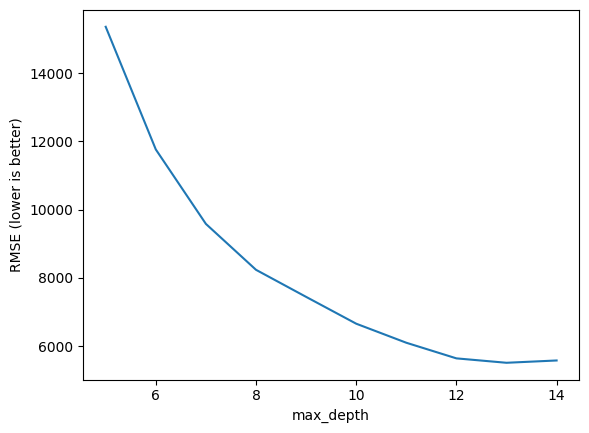

In [118]:
plt.plot(max_depth_range, RMSE_Scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [119]:
# max_depth=11 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=14, random_state=345)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, random_state=345)

In [120]:
treereg.feature_importances_

array([4.00798825e-02, 7.01052235e-01, 1.92539220e-01, 8.86026752e-03,
       2.71015891e-03, 1.42557193e-03, 8.72778326e-04, 7.18984183e-03,
       2.51281501e-03, 3.46565419e-04, 1.50872923e-02, 2.00269373e-03,
       1.24729087e-04, 1.54386632e-02, 9.21260739e-03, 0.00000000e+00,
       5.44678268e-04])

In [121]:
pd.DataFrame({'feature':data.columns.difference(['Weekly_Sales']), 'importance':treereg.feature_importances_})

,feature,importance
0,CPI,0.040080
1,Day,0.701052
2,Dept,0.192539
3,Fuel_Price,0.008860
4,IsHoliday,0.002710
5,MarkDown1,0.001426
6,MarkDown2,0.000873
7,MarkDown3,0.007190
8,MarkDown4,0.002513
9,MarkDown5,0.000347


In [122]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.png', feature_names=data.columns.difference(['Weekly_Sales']))

In [123]:
pred=treereg.predict(X_train)
y_pred=treereg.predict(X_test)

In [124]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 1211.4555360847978
Mean Squared Error: 6470515.588545041
Root Mean Squared Error: 2543.720815762815


In [125]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2191.8744912812745
Mean Squared Error: 42097727.2987603
Root Mean Squared Error: 6488.276142301613


In [126]:

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9905346601159544
R-squared for Test: 0.936970396821808


In [127]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rfr = RandomForestRegressor(max_depth=5,n_estimators=20, random_state=0)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_train)

In [130]:
y_pred= rfr.predict(X_test)
y_pred

array([14940.53873313, 14940.53873313, 20294.99740026, ...,
        5061.13239374,  5061.13239374, 20294.99740026])

In [131]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 8748.252178405006
Mean Squared Error: 229555609.0858207
Root Mean Squared Error: 15151.09266969946


In [132]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 8751.092665860177
Mean Squared Error: 220278620.4297108
Root Mean Squared Error: 14841.786295109858


In [133]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.6641964875051023
R-squared for Test: 0.670194214148632


In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid={'max_depth': range(8,15),
            'n_estimators': (10, 50)}

In [136]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)\






In [137]:
grid_result.best_score_

0.9698187245161062

In [138]:
grid_result.best_params_

{'max_depth': 14, 'n_estimators': 50}

In [139]:
rfr = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=50, random_state=0)

In [140]:
pred = rfr.predict(X_train)
y_pred = rfr.predict(X_test)

In [141]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 1267.4371190007475
Mean Squared Error: 6583033.634782365
Root Mean Squared Error: 2565.742316520185


In [142]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 1835.0885672886889
Mean Squared Error: 20413376.492429577
Root Mean Squared Error: 4518.11647619111


In [143]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9903700640283395
R-squared for Test: 0.9694366631549073


In [144]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit

In [145]:
gbrt=GradientBoostingRegressor()
gbrt.fit(X_train, y_train)

GradientBoostingRegressor()

In [146]:
pred=gbrt.predict(X_train)
y_pred=gbrt.predict(X_test)

In [147]:
print(gbrt.feature_importances_)

[1.17840591e-02 7.24139216e-01 1.32506640e-01 2.87613022e-04
 1.82732239e-04 2.26815343e-05 0.00000000e+00 6.44296101e-03
 9.78764062e-05 0.00000000e+00 4.44124695e-03 9.71501815e-04
 0.00000000e+00 2.92541732e-03 7.27629024e-04 1.15470426e-01
 0.00000000e+00]


In [148]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 6263.477631064547
Mean Squared Error: 108611663.67889734
Root Mean Squared Error: 10421.691977740338


In [149]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 6342.266504272588
Mean Squared Error: 111142314.10441105
Root Mean Squared Error: 10542.405517926687


In [150]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.8411183316036817
R-squared for Test: 0.8335953885445668


In [151]:
param_grid={'learning_rate' : [0.1,0.01],# 0.02,0.05,0.1],
            'max_depth' : [4,6]}# 5,6]

In [152]:
# Perform Grid-Search
gbr = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid)

grid_result = gbr.fit(X_train, y_train)

In [153]:
grid_result.best_score_

0.9553489373874328

In [154]:
grid_result.best_params_

{'learning_rate': 0.1, 'max_depth': 6}

In [155]:
gbrt=GradientBoostingRegressor(learning_rate=0.01, max_depth=6)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6)

In [156]:
pred=gbrt.predict(X_train)
y_pred=gbrt.predict(X_test)

In [157]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9112.893333468624
Mean Squared Error: 186690903.58860478
Root Mean Squared Error: 13663.48797301058


In [158]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9173.348197868787
Mean Squared Error: 184270810.48312604
Root Mean Squared Error: 13574.638502852518


In [159]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.7269007652413223
R-squared for Test: 0.7241058649164354


In [160]:
import xgboost as xgb
import warnings

In [161]:
warnings.filterwarnings("ignore", category=FutureWarning)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [162]:
pred=xg_reg.predict(X_train)
y_pred=xg_reg.predict(X_test)

In [163]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 1930.932016524347
Mean Squared Error: 11643530.30620472
Root Mean Squared Error: 3412.2617581605195


In [164]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2209.6718699696808
Mean Squared Error: 18175749.198342558
Root Mean Squared Error: 4263.302616322533


In [165]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9829673585836772
R-squared for Test: 0.9727868858262188


In [166]:
xgb1 = xgb.XGBRegressor(objective='reg:squarederror')

In [167]:
parameters = {'learning_rate': [0.01,0.1], #so called `eta` value
              'max_depth': [4,5,6]}

In [168]:
xgb_grid = GridSearchCV(xgb1,parameters,n_jobs = 5,verbose=True)

grid_result = xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [169]:
print(xgb_grid.best_score_)

0.9532662010498193


In [170]:
print(xgb_grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 6}


In [171]:
xg_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=9,objective='reg:squarederror')
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [172]:
pred=xg_reg.predict(X_train)
y_pred=xg_reg.predict(X_test)

In [173]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 1427.3069501609964
Mean Squared Error: 6155238.330073837
Root Mean Squared Error: 2480.9752780053727


In [174]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 1851.645303599042
Mean Squared Error: 13365466.591027344
Root Mean Squared Error: 3655.8810964017066


In [175]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9909958608299164
R-squared for Test: 0.9799889421691265


In [176]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [177]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [178]:
pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

In [179]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 10012.533165033967
Mean Squared Error: 280448802.5966059
Root Mean Squared Error: 16746.605703742054


In [180]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 12113.734743518382
Mean Squared Error: 397786198.0732678
Root Mean Squared Error: 19944.578162329424


In [181]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.5897478028876204
R-squared for Test: 0.40442613359182344


In [182]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 27181.812444069197
RMSE value for k=  2 is: 22773.93259328599
RMSE value for k=  3 is: 20960.666160383073
RMSE value for k=  4 is: 20321.507775931077
RMSE value for k=  5 is: 19944.578162329424
RMSE value for k=  6 is: 19967.094549276157
RMSE value for k=  7 is: 20010.50351492612
RMSE value for k=  8 is: 20033.888153106313
RMSE value for k=  9 is: 20054.530736371344
RMSE value for k=  10 is: 20095.55127241638
RMSE value for k=  11 is: 20093.74636576142
RMSE value for k=  12 is: 20099.491743722818
RMSE value for k=  13 is: 20083.825078409034
RMSE value for k=  14 is: 20101.010620979825
RMSE value for k=  15 is: 20118.598145278112
RMSE value for k=  16 is: 20097.51486824585
RMSE value for k=  17 is: 20152.40273520368
RMSE value for k=  18 is: 20185.00571030941
RMSE value for k=  19 is: 20235.910465618414
RMSE value for k=  20 is: 20279.308117396475


<Axes: >

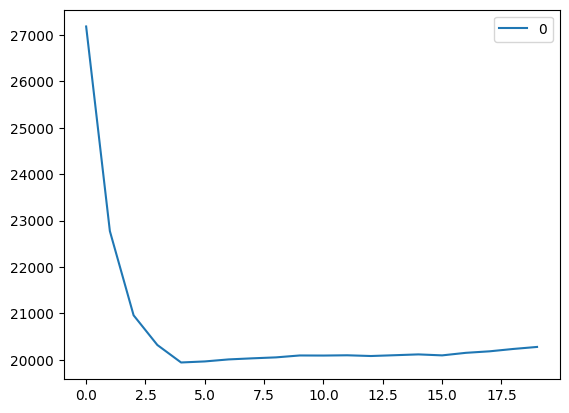

In [183]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [184]:
knn = neighbors.KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [185]:
pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

In [186]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 10962.153082532799
Mean Squared Error: 346049946.24873793
Root Mean Squared Error: 18602.417752774447


In [187]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 11972.33234296976
Mean Squared Error: 403758643.01155025
Root Mean Squared Error: 20093.74636576142


In [188]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.493783715798672
R-squared for Test: 0.3954840633514989


In [189]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import warnings

In [190]:
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore FutureWarning
reg1 = GradientBoostingRegressor(learning_rate=0.01, max_depth=6)
reg2 = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0)
reg3 = xgb.XGBRegressor(learning_rate=0.1, max_depth=4,objective='reg:squarederror')
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('xg', reg3)])
ereg = ereg.fit(X_train, y_train)

In [191]:
pred= ereg.predict(X_train)
y_pred= ereg.predict(X_test)

In [192]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 4552.830222077849
Mean Squared Error: 52988958.79752694
Root Mean Squared Error: 7279.351536883415


In [193]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 4689.290768483131
Mean Squared Error: 58770759.180737875
Root Mean Squared Error: 7666.208918411882


In [194]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9224855425728037
R-squared for Test: 0.9120071826359122


In [195]:
import pickle
# Saving model to disk of random forest
pickle.dump(rfr, open('model.pkl','wb'))

In [196]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,1	,151315,	10.00	,2.548	,211.242170	,8.106	,132.59, 125, 52, 0, 0	,2012	,12,	2,	2	,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([57785.79122667])

In [197]:
import numpy as np
import pickle
model=pickle.load(open('model.pkl', 'rb'))
x=np.array([[1, 1	,151315,	10.00	,3.548	,211.242170	,8.106	,140.59, 150, 85, 75, 0	,2012	,12,	2,	2	,1]])
model.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([54378.85995])